In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
dia_df = pd.read_csv("diabetes_new.csv")

In [65]:
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,110,92,0,0,37.6,0.191,30,0
1,10,168,74,0,0,38.0,0.537,34,1
2,10,139,80,0,0,27.1,1.441,57,0
3,1,189,60,23,846,30.1,0.398,59,1
4,5,166,72,19,175,25.8,0.587,51,1


In [66]:
print(dia_df.shape)

(758, 9)


In [67]:
dia_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
dia_df[['Insulin','SkinThickness','Glucose','BMI','BloodPressure']] = dia_df[['Insulin','SkinThickness','Glucose','BMI','BloodPressure']].replace(0, np.NaN)
#dia_df.dropna(inplace=True)

In [69]:
# sns.pairplot(dia_df)

In [70]:
dia_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127643,0.147581,-0.072223,-0.066659,0.026350,-0.025851,0.548108,0.223672
Glucose,0.127643,1.000000,0.154026,0.057084,0.327275,0.227396,0.135845,0.257928,0.464733
BloodPressure,0.147581,0.154026,1.000000,0.210326,0.090558,0.301029,0.049618,0.237572,0.065059
SkinThickness,-0.072223,0.057084,0.210326,1.000000,0.433184,0.390775,0.182136,-0.117978,0.071456
Insulin,-0.066659,0.327275,0.090558,0.433184,1.000000,0.197372,0.189899,-0.049638,0.126453
BMI,0.026350,0.227396,0.301029,0.390775,0.197372,1.000000,0.130759,0.045409,0.305026
DiabetesPedigreeFunction,-0.025851,0.135845,0.049618,0.182136,0.189899,0.130759,1.000000,0.035033,0.168728
Age,0.548108,0.257928,0.237572,-0.117978,-0.049638,0.045409,0.035033,1.000000,0.232704
Outcome,0.223672,0.464733,0.065059,0.071456,0.126453,0.305026,0.168728,0.232704,1.000000


In [71]:
x = dia_df.drop("Outcome",axis = 1)
y = dia_df["Outcome"]

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [75]:
x

array([[ 0.04818885, -0.33934639,  1.18365052, ...,  0.70986375,
        -0.86131148, -0.27272174],
       [ 1.83000085,  1.48137909,  0.24803105, ...,  0.76101659,
         0.20149611,  0.06756316],
       [ 1.83000085,  0.57101635,  0.5599042 , ..., -0.6328983 ,
         2.97831132,  2.02420132],
       ...,
       [ 0.34515751,  0.00596362,  0.14407333, ..., -0.74799219,
        -0.69543978, -0.27272174],
       [-0.84271715,  0.16292271, -0.47967298, ..., -0.249252  ,
        -0.37598316,  1.17348908],
       [-0.84271715, -0.87300731,  0.04011561, ..., -0.21088737,
        -0.4804209 , -0.86822031]])

In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 150)

In [101]:
from sklearn.linear_model import LogisticRegression

log_model1 = LogisticRegression()

log_model1.fit(x_train,y_train)

y_pred = log_model1.predict(x_test)

In [102]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[106  13]
 [ 27  44]]


In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7894736842105263
Precision: 0.7719298245614035
Recall: 0.6197183098591549


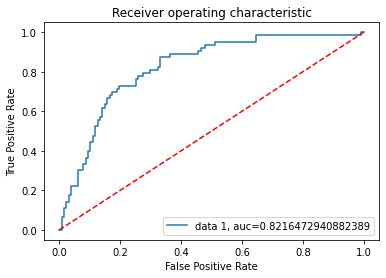

In [80]:
y_pred_probability = log_model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [92]:
from sklearn.feature_selection import RFE

rfe = RFE(log_model1, 4)
fit = rfe.fit(x_train, y_train)

print(dia_df.columns)
print(fit.n_features_)
print(fit.ranking_)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
4
[1 1 1 5 3 1 2 4]


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [104]:
x2 = dia_df[["Pregnancies","Glucose","BloodPressure","BMI"]]
y2 = dia_df["Outcome"]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 150)

log_model2 = LogisticRegression()
log_model2.fit(x2_train,y2_train)
y2_pred = log_model2.predict(x2_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))

[[106  13]
 [ 27  44]]
Accuracy: 0.7842105263157895
Precision: 0.75
Recall: 0.6338028169014085


In [111]:
dia_test_df = pd.read_csv("diabetes_new_patients.csv")

x_new = dia_test_df

In [112]:
x_new.shape

(10, 8)

In [113]:
y_new_pred = log_model1.predict(x_new)

In [114]:
y_new_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])